# overview exercises

# T-Test exercises

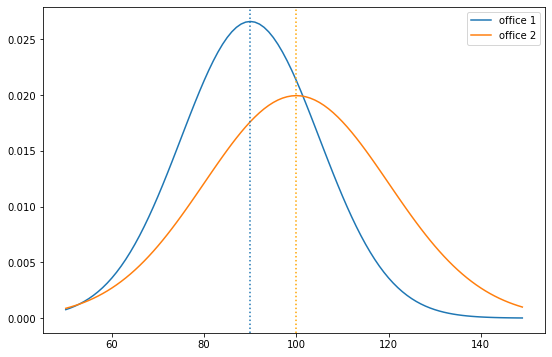

In [18]:
#visualization 

# Visualize two distribution:

x = np.arange(50,150)

y1 = stats.norm(90,15).pdf(x)
y2 = stats.norm(100,20).pdf(x)

plt.figure(figsize=(9,6))
plt.plot(x, y1, label = 'office 1')
plt.plot(x, y2, label = 'office 2')
plt.axvline(90, ls = ':')
plt.axvline(100, ls = ':', color = 'orange')

plt.legend()

In [19]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

#Measuring average time it takes to sell home in days. 
#Anova test 


α = .05


In [21]:

office_1 = stats.norm(90,15).rvs(40)
office_2 = stats.norm(100, 20).rvs(50)
#use rvs to generate random results of samples 
#not given specific info for samples 

In [22]:
print(office_1.var())
print(office_2.var())

165.1095014996668
480.34269869208873


In [23]:
stat,p_val = stats.levene(office_1, office_2)

if p_val < .05:
    print('we can reject H0 ==> inequal variance')
    
#conduct levene test to determine if variance equal or not

In [24]:
p_val

0.10485828637271083

In [25]:

t_stat, p_val = stats.ttest_ind(office_1, office_2, equal_var=False)
print(f't-stat): {t_stat}')
print(f'p-value: {p_val}')

t-stat): -2.920706444472955
p-value: 0.004517377218652914


In [8]:
#copy past print statement 

print(f'''
Because the p-value ({p_val}) is less than alpha value ({α}), we reject the null hypothesis''')


Because the p-value (0.0033891628476190976) is less than alpha value (0.05), we reject the null hypothesis


# But we used random values?

We note that simulating the random values from the distributive stats are not providing us with the level of detail that we may want out of a problem like this. In order to get the most ideal results possible, we will conduct a slightly different variation of the test using ttest_ind_from_stats, which is more alligned with the information that has been posited to us in this specific scenario.

T-test using descriptive stats: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind_from_stats.html

In [28]:
t_stat, pval = stats.ttest_ind_from_stats(90,15,40,100,20,50, equal_var=False)


In [29]:
if pval < α:
    print('Our p-value is less than alpha and we can reject the null hypothesis, indicating some difference in the sales time between the offices.')

Our p-value is less than alpha and we can reject the null hypothesis, indicating some difference in the sales time between the offices.


In [30]:
from pydataset import data

mpg = data('mpg')

mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


Calculate average fuel economy assuming 50% highway and 50% city driving

Should I use arithmetic mean or harmonic mean for average mpg?
Arithmetic Mean: fe_am = (cty + hwy)/2
Harmonic Mean: fe_hm = 2/(1/cty + 1/hwy)

In [31]:
mpg['avg_fe'] = stats.hmean(mpg[['cty', 'hwy']], axis =1)

# creates avg fuel efficiency column with harmonic mean across all cars

In [32]:
fe_2008 = mpg[mpg.year == 2008].avg_fe 
fe_1999 = mpg[mpg.year == 1999].avg_fe 


#now filter by year column with avg fuel efficiency

<AxesSubplot:>

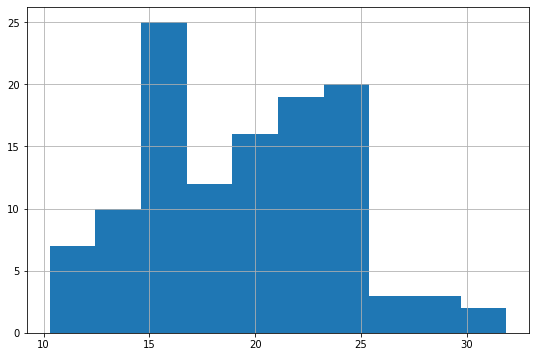

In [33]:
#creates histograms of both 
plt.figure(figsize=(9,6))
fe_2008.hist()

In [34]:
fe_2008.count(), fe_1999.count()

#normality assumption 

(117, 117)

In [35]:
#check variance 
fe_2008.var(), fe_1999.var()

#levene test next

(22.550836772260343, 25.850396545865912)

In [36]:
#levene test 
stats.levene(fe_2008, fe_1999)

LeveneResult(statistic=0.031071867429515194, pvalue=0.8602339200830025)

In [37]:
t, p = stats.ttest_ind(fe_2008, fe_1999)
t,p

(-0.3011962975077886, 0.7635345888327115)

In [38]:
print(f'''
Because p({p:.3f})) > alpha (.05), we fail to reject th null hypothesis that there is no difference in fuel-efficiency in cars\from 2008 and 1999.''')

#.3f limits to thousandsths place for rounding


Because p(0.764)) > alpha (.05), we fail to reject th null hypothesis that there is no difference in fuel-efficiency in carsrom 2008 and 1999.


In [39]:
fe_2008.mean(), fe_1999.mean()

(19.488662986569054, 19.68238764869729)

In [40]:
#create side by side histogram 

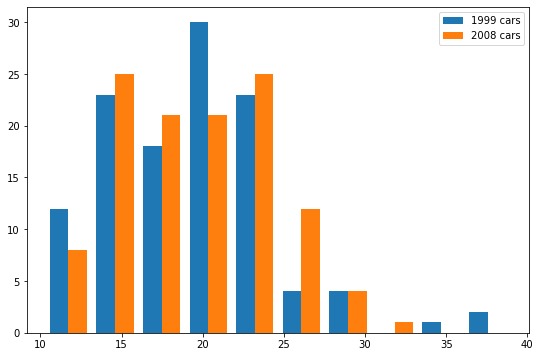

In [41]:
plt.figure(figsize=(9,6))
plt.hist([fe_1999, fe_2008], label=["1999 cars", "2008 cars"])
plt.legend(loc="upper right")

**C. Set Significance Level**

In [49]:
alpha = .05

In [50]:
#t value and p value 
#because one tail have to do p/2 and t > 0 if compact car goes into function first 

In [51]:
fe_compact = mpg[mpg['class'] == 'compact'].avg_fe
μ = mpg.avg_fe.mean()

In [52]:
#mean fuel efficeincy of all cars 
m = mpg.avg_fe.mean()

In [53]:
fe_compact.count()

#greater than 30 assume normality

47

<AxesSubplot:>

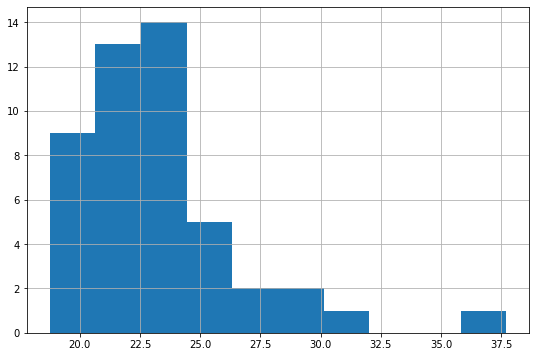

In [54]:
# look at distribution of fuel economy of compact cars. It also shows > 30 observations
# so we meet normality assunption for t-test

plt.figure(figsize=(9,6))
fe_compact.hist()

In [55]:
# calculate t and p values:

t, p = stats.ttest_1samp(fe_compact, μ)
t, p/2, alpha
#significantly less than alpha 

#there appears to be a relationship between compact cars and mpg 

(7.512360093161354, 7.808833174403837e-10, 0.05)

In [56]:
print(f'''Because p/2 ({p/2:.11f}) < alpha (.05) and t > 0, we reject the null hypothesis.''')


Because p/2 (0.00000000078) < alpha (.05) and t > 0, we reject the null hypothesis.


In [57]:
mpg.trans.value_counts()

#vehicle counts

auto(l4)      83
manual(m5)    58
auto(l5)      39
manual(m6)    19
auto(s6)      16
auto(l6)       6
auto(av)       5
auto(s5)       3
auto(s4)       3
auto(l3)       2
Name: trans, dtype: int64

In [58]:
mpg.trans.str.contains('auto')

#find automatic cars 


1       True
2      False
3      False
4       True
5       True
       ...  
230     True
231    False
232     True
233    False
234     True
Name: trans, Length: 234, dtype: bool

In [59]:
fe_auto = mpg[mpg.trans.str.contains('auto')].avg_fe
fe_man = mpg[mpg.trans.str.contains('manual')].avg_fe

#only automatics 

<AxesSubplot:>

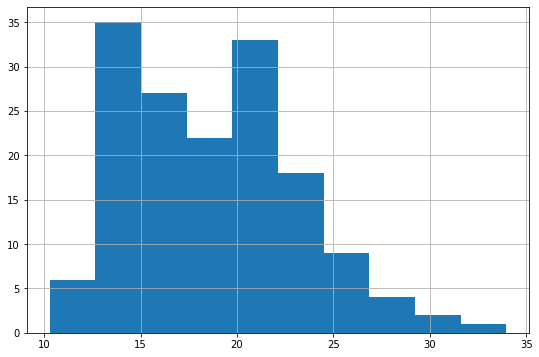

In [60]:
#visual of fuel efficiency 
# look at the distribution. N >30

plt.figure(figsize=(9,6))
fe_auto.hist()

<AxesSubplot:>

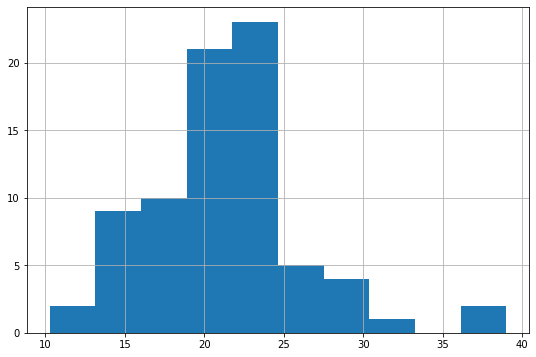

In [61]:
# look at the distribution. N >30

plt.figure(figsize=(9,6))
fe_man.hist()

In [62]:
#normalcy with counts 
fe_auto.count(), fe_man.count()

(157, 77)

In [63]:
#check variance

fe_auto.var(), fe_man.var()

(20.428279095002054, 25.665633639828275)

In [64]:
stats.levene(fe_auto, fe_man)

LeveneResult(statistic=0.013901207169738269, pvalue=0.9062462281015493)

In [65]:
t, p = stats.ttest_ind(fe_man, fe_auto, equal_var = True)

t, p/2

#manual first because checking if manual > auto
# t greater than 1, p < .05 reject null

#there appears to be a significance
#that manual cars get more gas mpg than automatic 

(4.652577547151351, 2.7552323050220043e-06)

In [66]:
print(f'''
Because p/2 ({p/2:.6f}) < alpha (.05), and t > 0, we reject the null hypothesis''')


Because p/2 (0.000003) < alpha (.05), and t > 0, we reject the null hypothesis


In [67]:
mpg['transmission_type'] = np.where(mpg.trans.str.contains('auto'), 'Auto Transmission', 'Manual Transmission')


Text(0.5, 1.0, 'Is mileage different by transmission type?')

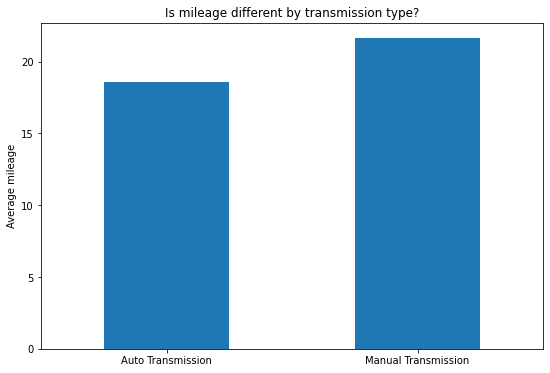

In [68]:
plt.figure(figsize=(9,6))
mpg.groupby('transmission_type').avg_fe.mean().plot.bar()
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('Average mileage')
plt.title('Is mileage different by transmission type?')

# Correlation Exercises 

In [96]:
# read from the SQL database
from get_db_url import make_db

    
df = make_db('telco_churn','SELECT * FROM customers')
df

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.60,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.90,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.90,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.00,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.90,267.4,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,1,Yes,...,No,Yes,No,No,2,No,2,55.15,742.9,No
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,2,No,...,No,No,No,Yes,1,Yes,1,85.10,1873.7,Yes
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,1,No,...,No,No,No,No,1,Yes,2,50.30,92.75,No
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,1,Yes,...,Yes,Yes,No,Yes,3,No,2,67.85,4627.65,No


In [97]:
#explore data
df.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service_type_id',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract_type_id',
       'paperless_billing', 'payment_type_id', 'monthly_charges',
       'total_charges', 'churn'],
      dtype='object')

In [98]:
#limit scope of dataset
df = df[['tenure','monthly_charges', 'total_charges','internet_service_type_id', 'phone_service']]

In [83]:
#identify empty spaces 
df.sort_values(by='total_charges').head()


,tenure,monthly_charges,total_charges,internet_service_type_id,phone_service
2855,0,73.35,,1,Yes
3118,0,52.55,,1,No
3052,0,25.75,,3,Yes
5433,0,19.85,,3,Yes
1731,0,20.00,,3,Yes


In [84]:
#identify empty spaces 
df.total_charges.value_counts() # whitespace characters used as null values


           11
20.2       11
19.75       9
19.9        8
20.05       8
           ..
2387.75     1
6302.8      1
2058.5      1
829.55      1
3707.6      1
Name: total_charges, Length: 6531, dtype: int64

In [99]:
df.info() # several null values in total charges


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   tenure                    7043 non-null   int64  
 1   monthly_charges           7043 non-null   float64
 2   total_charges             7043 non-null   object 
 3   internet_service_type_id  7043 non-null   int64  
 4   phone_service             7043 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 275.2+ KB


In [100]:
#change blank spaces to null 
df.total_charges = df.total_charges.replace(' ', np.nan).astype(float)


/var/folders/f1/m4_s2k_97xng0khbnvxb1jbw0000gn/T/ipykernel_71629/3937069102.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.total_charges = df.total_charges.replace(' ', np.nan).astype(float)


In [102]:
df = df.dropna()
df.info()
#dropping null values 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   tenure                    7032 non-null   int64  
 1   monthly_charges           7032 non-null   float64
 2   total_charges             7032 non-null   float64
 3   internet_service_type_id  7032 non-null   int64  
 4   phone_service             7032 non-null   object 
dtypes: float64(2), int64(2), object(1)
memory usage: 329.6+ KB


# 2a. Does tenure correlate with monthly charges?
- $\alpha = .05$
- $H_0$: There is no linear relationship between tenure and monthly_charges.
- $H_a$: There is a linear relationship between tenure and monthly_charges.

<AxesSubplot:xlabel='tenure', ylabel='monthly_charges'>

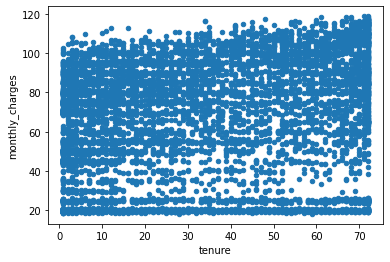

In [103]:
#chart of variables 

df.plot.scatter(y='monthly_charges', x='tenure')

In [104]:
x = df.tenure
y = df.monthly_charges

In [105]:
r, p = stats.pearsonr(x, y)
print('r =', r)
print('p =', p)

r = 0.2468617666408956
p = 3.9898213232510553e-98


In [106]:
if p < alpha:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Reject the null hypothesis


In [ ]:
# 0: No relationship
# 0 - 0.2: Weak positive relationship
# 0.2 - 0.4: Moderate positive relationship
# 0.4 - 1: Strong positive relationship

# 0 - -0.2: Weak negative relationship
# -0.2 - -0.4: Moderate negative relationship
# -0.4 - -1: Strong negative relationship

We reject the null hypothesis, but while there is a weak-moderate relationship between tenure and monthly charges, there are two relationships apparent on visual inspection:

- a rising channel ranging from 0 - 100 at t = 0 and ranging from 35 - 120 at t = end 

- Two horizontal bands for customers paying ~20 and 25
- Overall r and p scores demonstrate a weak positive correlation but the magnititude of the relationship is relatively small

# 2 b. Does tenure correlate with  total charges?
- $\alpha = .05$
- $H_0$: There is no linear relationship between tenure and total_charges.
- $H_a$: There is a linear relationship between tenure and total_charges.

In [107]:
df

,tenure,monthly_charges,total_charges,internet_service_type_id,phone_service
0,9,65.60,593.30,1,Yes
1,9,59.90,542.40,1,Yes
2,4,73.90,280.85,2,Yes
3,13,98.00,1237.85,2,Yes
4,3,83.90,267.40,2,Yes
...,...,...,...,...,...
7038,13,55.15,742.90,1,Yes
7039,22,85.10,1873.70,2,Yes
7040,2,50.30,92.75,1,Yes
7041,67,67.85,4627.65,1,Yes


<AxesSubplot:xlabel='tenure', ylabel='total_charges'>

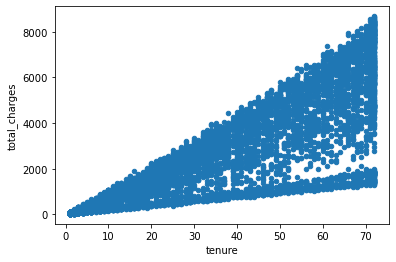

In [108]:
#chart of variables 

df.plot.scatter(y='total_charges', x='tenure')

In [111]:
#from get_db_url import make_db

x = df.tenure
y = df.total_charges

r, p = stats.pearsonr(x, y)
print('r =', r)
print('p =', p)

r = 0.8258804609332071
p = 0.0


# 2c. Control for phone and internet service?
- $\alpha = .05$
- $H_0$: There is no linear relationship between tenure and phone and internet service.
- $H_a$: There is a linear relationship between tenure and phone and internet service.

In [112]:
def corr_tenure_and_monthly(df):
    return pd.Series(stats.pearsonr(df.tenure, df.monthly_charges), index = ['r', 'p'])

#function being applied to groupby a couple lines down
# does stats test for each group 

In [114]:
# Do stuff faster with this ONE TRICK stakeholders hate!
# Groupby your control group(s)
# Apply the function that runs your stats test
df.groupby(['internet_service_type_id', 'phone_service'])

In [117]:
#do stuff faster with this one trick stakeholders hate!
df.groupby(['internet_service_type_id', 'phone_service']).apply(corr_tenure_and_monthly)


#what you are controlling goes into group by, what 
#you are testing goes in function of groupby on lines above
#Controlling for something, taking group apart and run test on
#individual pieces, phone service, internet service type being broken apart
#allows to identify no difference between the specific variables, 
#in this example type of internet and yes or no phone service



r              p
internet_service_type_id phone_service                         
1                        No             0.592430   1.173274e-65
                         Yes            0.658094  5.781402e-216
2                        Yes            0.624621   0.000000e+00
3                        Yes            0.346188   4.896605e-44

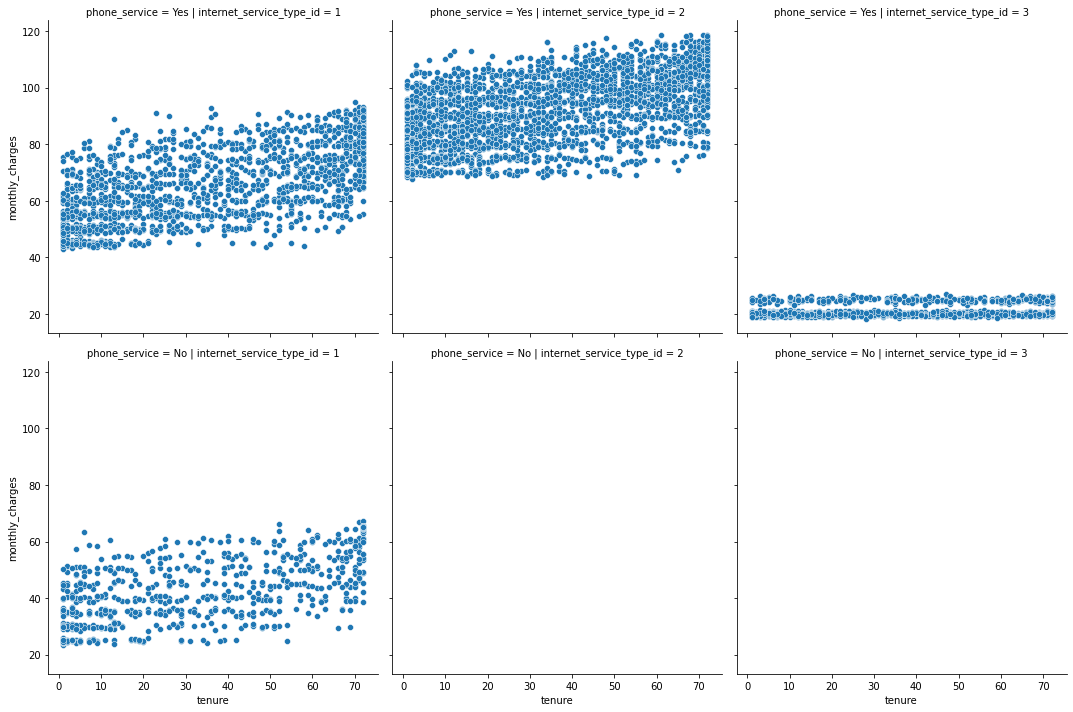

In [123]:
sns.relplot(data=df, y='monthly_charges', x='tenure', col='internet_service_type_id', row='phone_service')


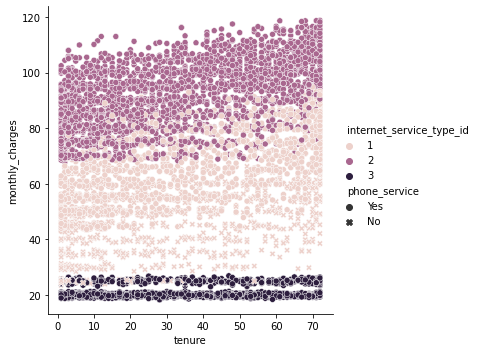

In [119]:
# You could cram it all into one visual if you wanted to...
sns.relplot(data=df, y='monthly_charges', x='tenure', hue='internet_service_type_id', style='phone_service')

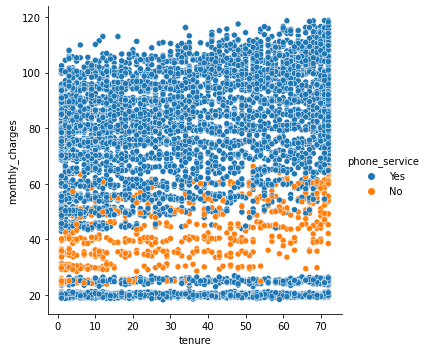

In [120]:
sns.relplot(data=df, y='monthly_charges', x='tenure', hue='phone_service')


In [121]:
def corr_tenure_and_total(df):
    return pd.Series(stats.pearsonr(df.tenure, df.total_charges), index=['r', 'p'])

In [122]:
df.groupby(['internet_service_type_id', 'phone_service']).apply(corr_tenure_and_total)


r    p
internet_service_type_id phone_service               
1                        No             0.953423  0.0
                         Yes            0.970533  0.0
2                        Yes            0.985309  0.0
3                        Yes            0.981465  0.0

Compare these results to the overall result:

In [124]:
stats.pearsonr(df.tenure, df.total_charges)


(0.8258804609332071, 0.0)

# 3a. Is there a relationship between how long an employee has been with the company and their salary?
- $\alpha = .05$
- $H_0$: There is no linear relationship between tenure and salary.
- $H_a$: There is a linear relationship between tenure and salary.

In [130]:
x = '''SELECT
    DATEDIFF((SELECT MAX(hire_date) FROM employees), e.hire_date) AS tenure,
    s.salary AS salary
FROM employees e
JOIN salaries s USING (emp_no)
WHERE s.to_date > NOW()'''

employees_with_salaries = make_db('employees', x)
employees_with_salaries

,tenure,salary
0,4964,88958
1,5181,72527
2,4901,43311
3,4806,74057
4,3790,94692
...,...,...
240119,2572,52868
240120,3410,69501
240121,5030,83441
240122,2298,55003


In [131]:
stats.pearsonr(employees_with_salaries.tenure, employees_with_salaries.salary)

(0.3064625613186014, 0.0)

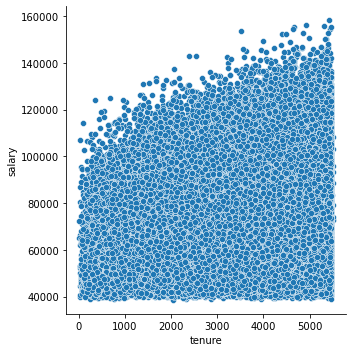

In [137]:
sns.relplot(data=employees_with_salaries.tenure, x=employees_with_salaries.tenure, y=employees_with_salaries.salary )

# 3b. Is there a relationship between how long an employee has been with the company and number of titles they have had?
- $\alpha = .05$
- $H_0$: There is no linear relationship between how long an employee has been with the company and number of titles there have had.
- $H_a$: There is a linear relationship between thow long an employee has been with the company and number of titles there have had.

In [139]:
x = '''SELECT
    e.emp_no,
    DATEDIFF((SELECT MAX(hire_date) FROM employees), e.hire_date) AS tenure,
    n_titles
FROM employees e
JOIN (
    SELECT emp_no, COUNT(*) as n_titles
    FROM employees e
    JOIN titles t USING (emp_no)
    GROUP BY emp_no
) emp_title_count USING (emp_no)'''

employees_with_titles = make_db('employees', x)

In [140]:
employees_with_titles.shape

(300024, 3)

In [141]:
employees_with_titles.head()

,emp_no,tenure,n_titles
0,10001,4964,1
1,10002,5181,1
2,10003,4901,1
3,10004,4806,2
4,10005,3790,2


In [142]:
stats.pearsonr(employees_with_titles.tenure, employees_with_titles.n_titles)


(0.2665989299134097, 0.0)

We reject the null hypothesis



# 4. Is there a relationship between days and reaction time?

- $\alpha = .05$
- $H_0$: There is no linear relationship between days and reaction time.
- $H_a$: There is a linear relationship between days and reaction time.

In [145]:
pydataset.data('sleepstudy', show_doc=True)

sleepstudy

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Reaction times in a sleep deprivation study

### Description

The average reaction time per day for subjects in a sleep deprivation study.
On day 0 the subjects had their normal amount of sleep. Starting that night
they were restricted to 3 hours of sleep per night. The observations represent
the average reaction time on a series of tests given each day to each subject.

### Format

A data frame with 180 observations on the following 3 variables.

`Reaction`

Average reaction time (ms)

`Days`

Number of days of sleep deprivation

`Subject`

Subject number on which the observation was made.

### Details

These data are from the study described in Belenky et al. (2003), for the
sleep-deprived group and for the first 10 days of the study, up to the
recovery period.

### References

Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen
C. Sing, Daniel P. Redmond, 

In [147]:
sleep = pydataset.data('sleepstudy')
sleep.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [148]:
stats.pearsonr(sleep.Reaction, sleep.Days) # reject null hypthesis

(0.5352302262650255, 9.89409632221439e-15)

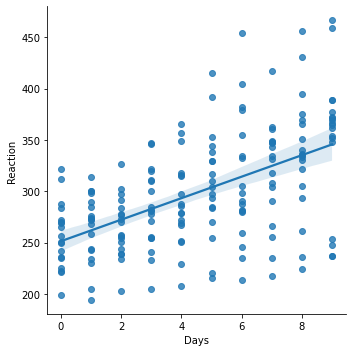

In [149]:
sns.lmplot(data=sleep, y='Reaction', x ='Days')

# chi Square Exercises

In [180]:
import pandas as pd
import numpy as np

from pydataset import data
from scipy import stats

In [181]:
observed =[[49, 20],[1, 30]]




In [182]:
observed = pd.DataFrame(observed)
observed

,0,1
0,49,20
1,1,30


In [183]:
chi2, p, degf, expected = stats.chi2_contingency(observed)


In [184]:
#output values
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p}')


Observed
[[49 20]
 [ 1 30]]

Expected
[[34 34]
 [15 15]]

----
chi^2 = 36.6526
p     = 1.4116760526193828e-09


In [185]:
if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We reject the null hypothesis


In [186]:
alpha = .05
mpg = data('mpg')

mpg.nunique()

manufacturer    15
model           38
displ           35
year             2
cyl              4
trans           10
drv              3
cty             21
hwy             27
fl               5
class            7
dtype: int64

Hypothesis
null - there is no association between the year and cylinder

alternative - there is an association between the year and cylinder 

In [187]:
mpg.year.value_counts()

1999    117
2008    117
Name: year, dtype: int64

In [188]:
mpg.cyl.value_counts()

4    81
6    79
8    70
5     4
Name: cyl, dtype: int64

In [189]:
observed = pd.crosstab(mpg.year, mpg.cyl)
observed

cyl,4,5,6,8
year,,,,
1999,45,0,45,27
2008,36,4,34,43


In [190]:
chi2, p, degf, expected = stats.chi2_contingency(observed)


In [191]:
p

0.01702768537665195

In [192]:
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[45  0 45 27]
 [36  4 34 43]]

Expected
[[40  2 39 35]
 [40  2 39 35]]

----
chi^2 = 10.1888
p     = 0.0170


In [193]:
if p < alpha:
    print('We reject the null')
else:
    print("we fail to reject the null")

We reject the null


In English - We reject the null, so there is an association between the year the car was manufactured and the cylinder type. 

In [194]:
x = '''select emp_no, gender, dept_name
        from employees
            join dept_emp
                using (emp_no)
            join departments
                using (dept_no)
        where to_date = '9999-01-01'
        and dept_name in ('Marketing','Sales')'''

emp = make_db('employees', x)
              
alpha = .05          
              
emp 

,emp_no,gender,dept_name
0,10017,F,Marketing
1,10058,M,Marketing
2,10140,F,Marketing
3,10228,F,Marketing
4,10239,F,Marketing
...,...,...,...
52538,499966,F,Sales
52539,499976,M,Sales
52540,499980,M,Sales
52541,499986,F,Sales


In [195]:
emp.gender.value_counts()

M    31680
F    20863
Name: gender, dtype: int64

In [196]:
emp.dept_name.value_counts()

Sales        37701
Marketing    14842
Name: dept_name, dtype: int64

In [197]:
observed = pd.crosstab(emp.gender, emp.dept_name)

In [198]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [199]:
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[ 5864 14999]
 [ 8978 22702]]

Expected
[[ 5893 14969]
 [ 8948 22731]]

----
chi^2 = 0.3240
p     = 0.5692


In [200]:
if p < alpha:
    print('We reject the null')
else:
    print("we fail to reject the null")

we fail to reject the null


In [201]:
x = '''select emp_no, gender, dept_no
        from employees
            left join dept_manager
                using (emp_no)'''

emp = make_db('employees', x)
emp

,emp_no,gender,dept_no
0,10001,M,None
1,10002,F,None
2,10003,M,None
3,10004,M,None
4,10005,M,None
...,...,...,...
300019,499995,F,None
300020,499996,M,None
300021,499997,M,None
300022,499998,M,None


In [202]:
emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300024 entries, 0 to 300023
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   emp_no   300024 non-null  int64 
 1   gender   300024 non-null  object
 2   dept_no  24 non-null      object
dtypes: int64(1), object(2)
memory usage: 6.9+ MB


In [203]:
#number of people not managers
emp.dept_no.value_counts(dropna=False)

None    300000
d004         4
d006         4
d009         4
d001         2
d002         2
d003         2
d005         2
d007         2
d008         2
Name: dept_no, dtype: int64

In [204]:
#fill in nulls/nones
df.dept_no = emp.dept_no.fillna('not manager')

/var/folders/f1/m4_s2k_97xng0khbnvxb1jbw0000gn/T/ipykernel_71629/3280645966.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.dept_no = emp.dept_no.fillna('not manager')


In [205]:
df.dept_no.value_counts()

not manager    300000
d004                4
d006                4
d009                4
d001                2
d002                2
d003                2
d005                2
d007                2
d008                2
Name: dept_no, dtype: int64

In [206]:
emp.dept_no = emp.dept_no.fillna('not manager')

In [207]:
emp.dept_no.value_counts()

not manager    300000
d004                4
d006                4
d009                4
d001                2
d002                2
d003                2
d005                2
d007                2
d008                2
Name: dept_no, dtype: int64

In [208]:
emp.dept_no = np.where( emp.dept_no != 'not manager', 
                      'manager', 'not manager')

In [209]:
emp.dept_no.value_counts()

not manager    300000
manager            24
Name: dept_no, dtype: int64

In [210]:
observed = pd.crosstab(emp.gender, emp.dept_no)
observed

dept_no,manager,not manager
gender,,
F,13,120038
M,11,179962


In [211]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [212]:
#output values
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[    13 120038]
 [    11 179962]]

Expected
[[     9 120041]
 [    14 179958]]

----
chi^2 = 1.4567
p     = 0.2275


In [213]:
#conclude
if p < alpha:
    print('We reject the null hypothesis')
else:
    print("we fail to reject the null hypothesis")

we fail to reject the null hypothesis
